<h1 style="text-align:center;font-size:50px;">Ensemble Learning</h1>

# Imports 👇

In [2]:
import pandas
import numpy
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import matplotlib.pyplot as pyplot

##### 👇 setting the matplotlib configurations

In [79]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (8, 5)

# Data Reading 👇

In [75]:
classes_list=['low cost', 'medium cost', 'high cost','very high cost']

In [17]:
data=pandas.read_csv('./mobiledata.csv')

### 👇 cheking the columns, data, data type information, correlation between attributes

In [18]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [19]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [66]:
list(data.iloc[0,:])

[842, 0, 0, 1, 0, 7, 188, 2, 20, 756, 2549, 9, 7, 19, 0, 0, 1, 1]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [23]:
data.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

# Dimentiality reduction

In [24]:
data=data.drop(['clock_speed','m_dep','n_cores'],axis=1)

# Data Visualization 👇

In [26]:
data

battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
0               842     0         0   1       0           7        188   2   
1              1021     1         1   0       1          53        136   6   
2               563     1         1   2       1          41        145   6   
3               615     1         0   0       0          10        131   9   
4              1821     1         0  13       1          44        141  14   
...             ...   ...       ...  ..     ...         ...        ...  ..   
1995            794     1         1   0       1           2        106  14   
1996           1965     1         1   0       0          39        187   3   
1997           1911     0         1   1       1          36        108   3   
1998           1512     0         0   4       1          46        145   5   
1999            510     1         1   5       1          45        168  16   

      px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
0            20       756  2549     9     7         19        0             0   
1           905      1988  2631    17     3          7        1             1   
2          1263      1716  2603    11     2          9        1             1   
3          1216      1786  2769    16     8         11        1             0   
4          1208      1212  1411     8     2         15        1             1   
...         ...       ...   ...   ...   ...        ...      ...           ...   
1995       1222      1890   668    13     4         19        1             1   
1996        915      1965  2032    11    10         16        1             1   
1997        868      1632  3057     9     1          5        1             1   
1998        336       670   869    18    10         19        1             1   
1999        483       754  3919    19     4          2        1             1   

      wifi  price_range  
0        1            1  
1        0            2  
2        0            2  
3        0            2  
4        0            1  
...    ...          ...  
1995     0            0  
1996     1            2  
1997     0            3  
1998     1            0  
1999     1            3  

[2000 rows x 18 columns]

## 👇 checking the available number of classes

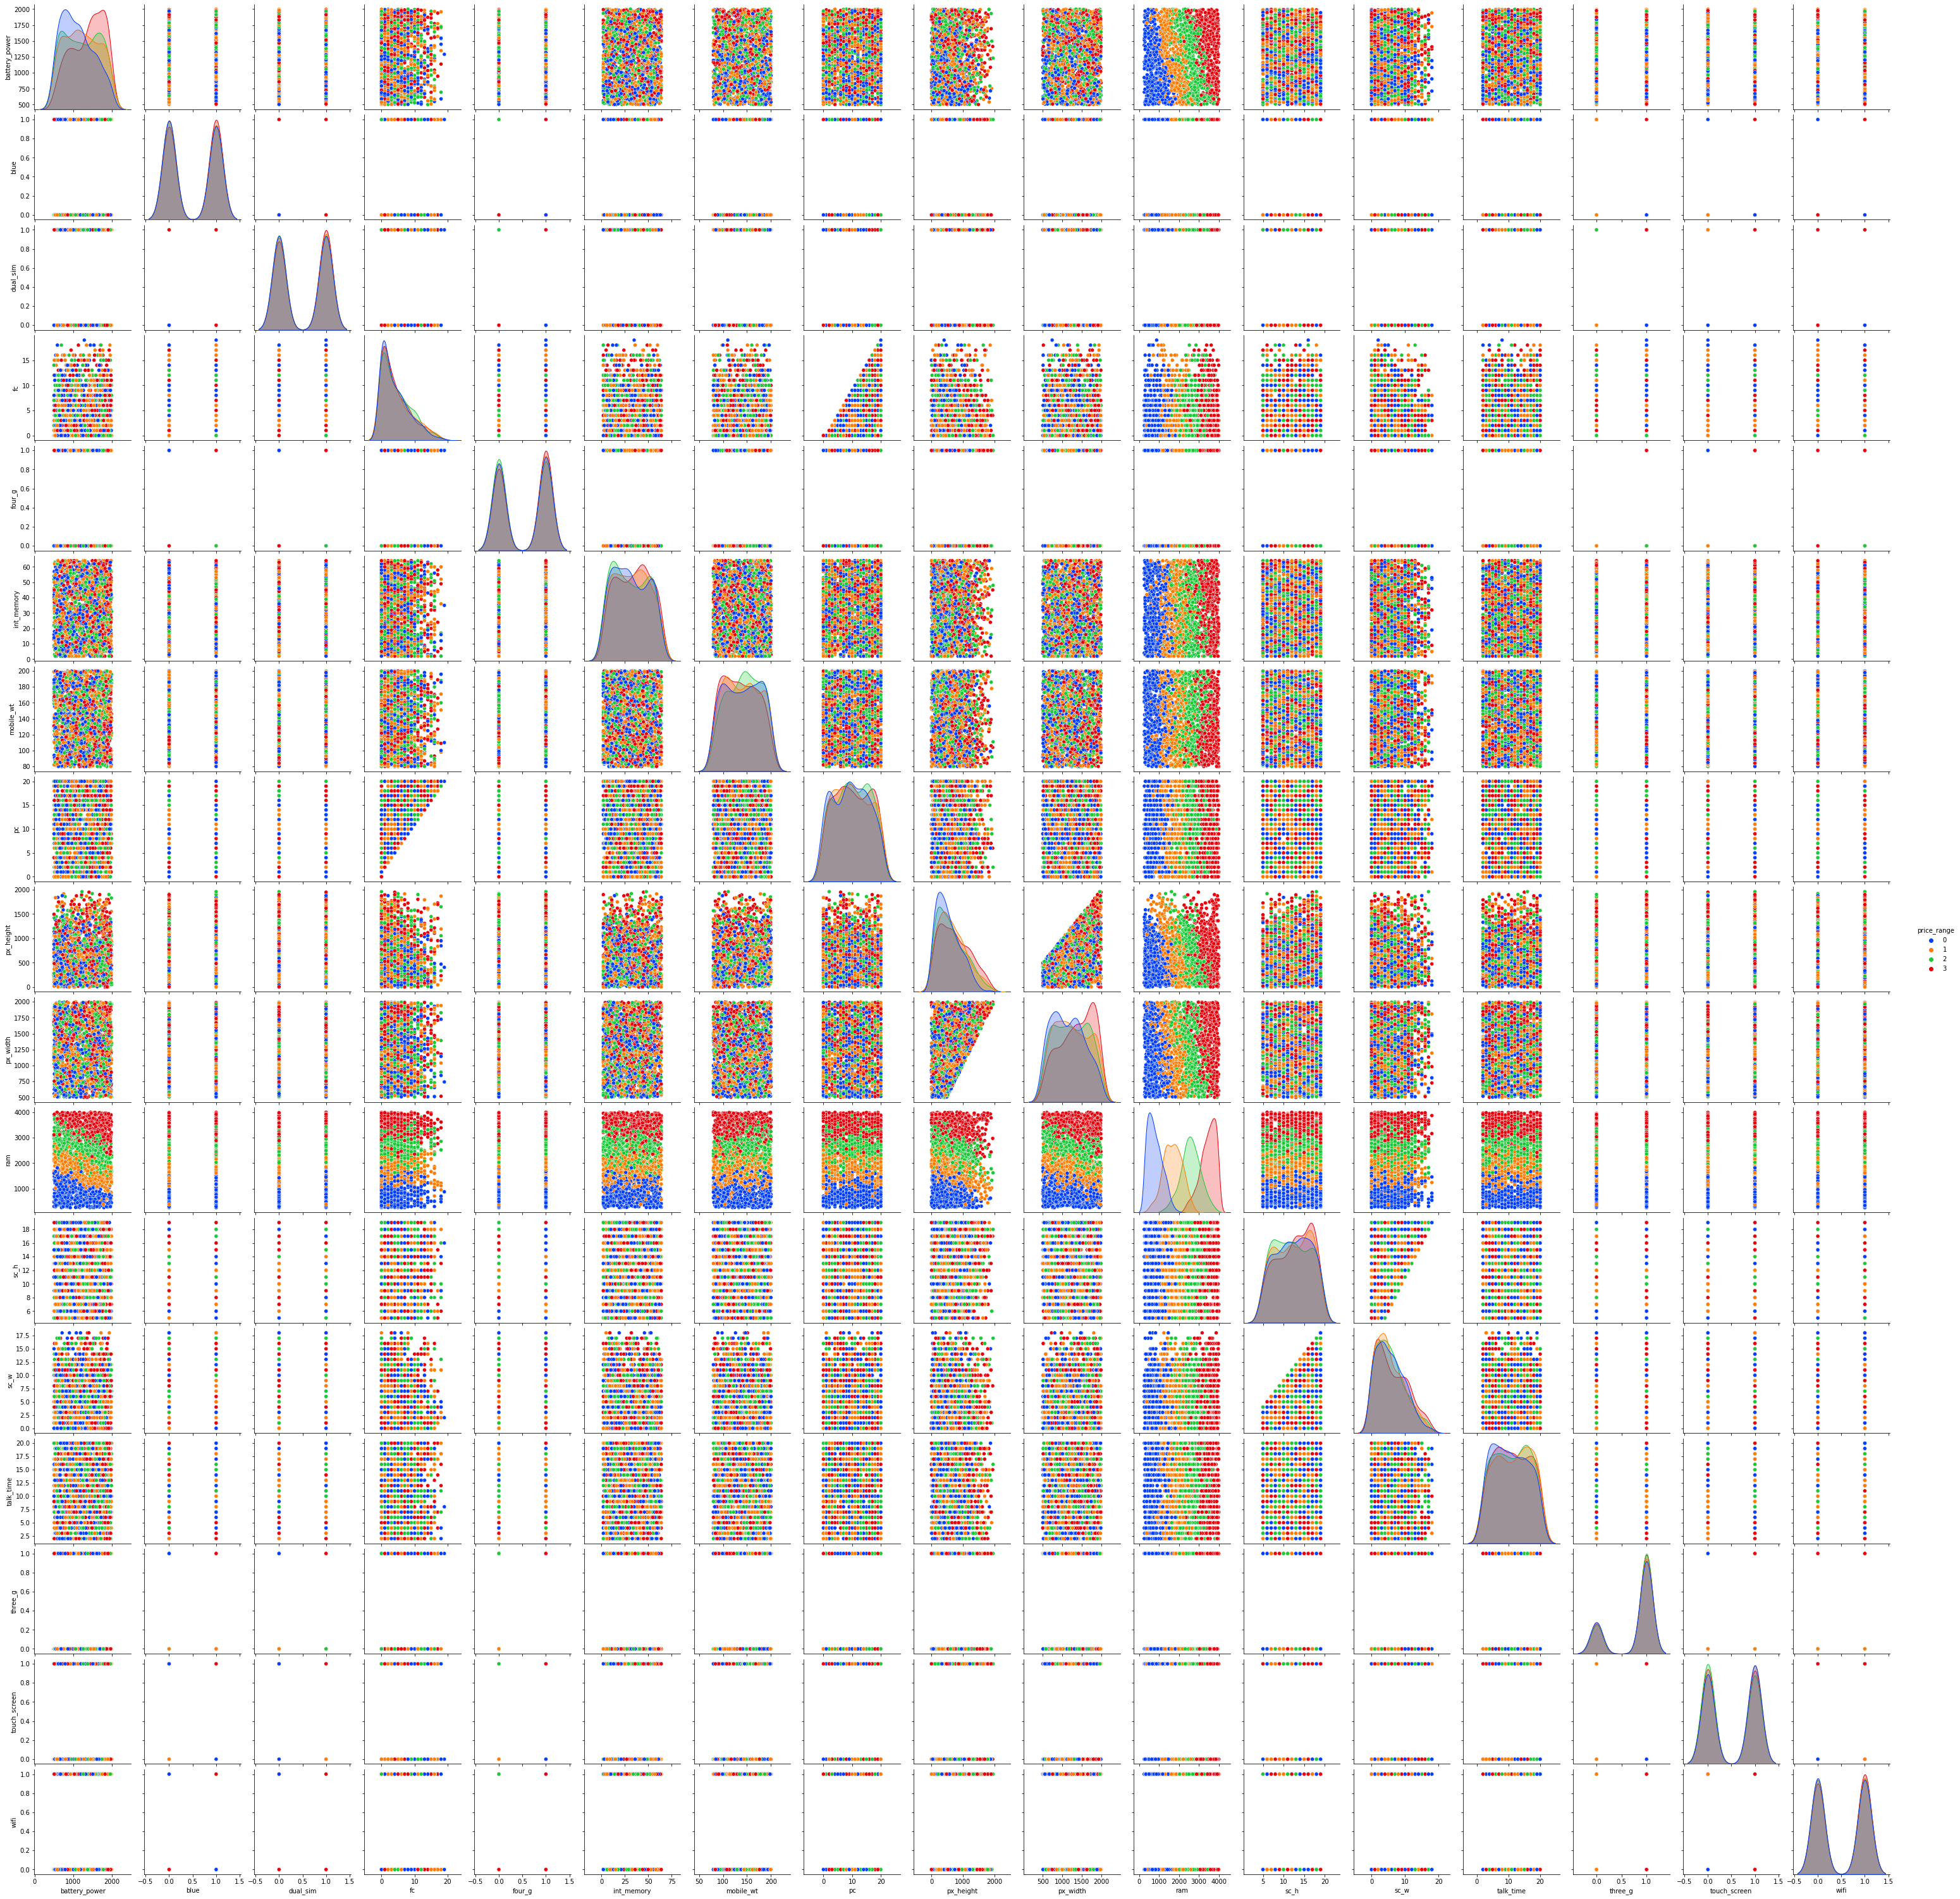

In [31]:
seaborn.pairplot(data.iloc[:,:18], hue="price_range",palette="bright")

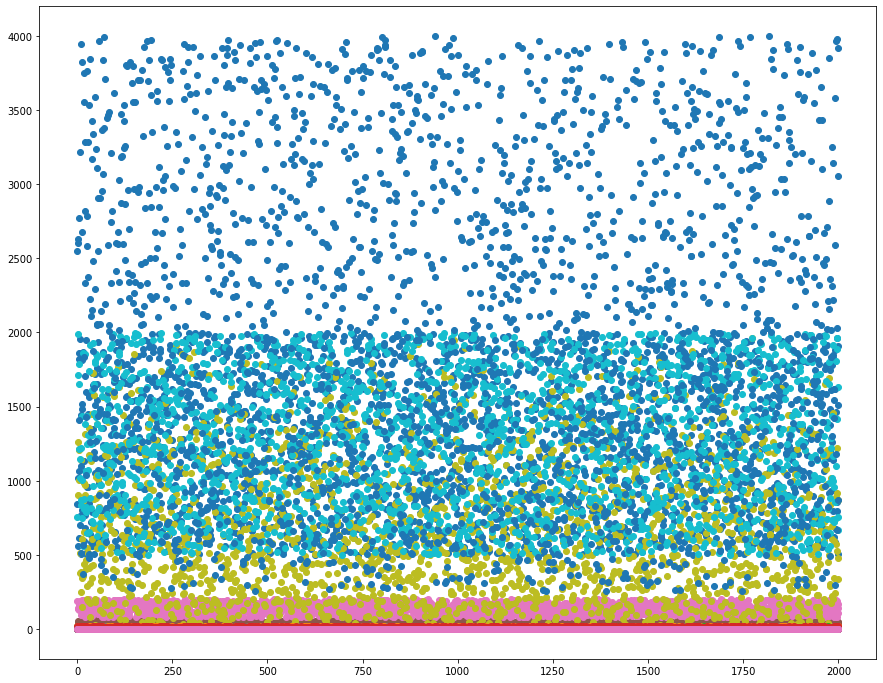

In [30]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,1])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,2])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,3])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,4])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,5])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,6])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,7])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,8])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,9])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,10])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,11])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,12])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,13])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,15])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,16])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,17])

# Data Preparation

### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing

In [32]:
shuffled_Data=data.sample(frac=1)

## Splitting the dataset into training and testing 👇

For Training 85% data is being used and for testing 15% data is used from the given data


In [33]:
training_value=int(len(shuffled_Data)*0.85)

In [34]:
Training_Data = shuffled_Data[:training_value]
Testing_Data = shuffled_Data[training_value:]

In [36]:
Training_Data['price_range'].value_counts()

1    433
2    427
0    425
3    415
Name: price_range, dtype: int64

In [37]:
Training_Data

battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
1639           1768     1         0   0       1           2         88   2   
338            1391     0         0   2       1          36        182   6   
327            1995     1         0   6       0          26        129  15   
498            1926     1         1   1       1          33        172   2   
1419            820     0         1   2       0          58        160   4   
...             ...   ...       ...  ..     ...         ...        ...  ..   
1673           1504     0         1   7       1          25        152   9   
669             723     0         0   0       1           3        168   3   
1841            592     0         1   1       0          52        103  10   
822             839     0         1   0       0          14        175   3   
479            1589     1         1   2       0          58        128   4   

      px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
1639       1303      1814  3256     9     6          5        1             1   
338          14      1256  3139    14     7         14        1             1   
327         649      1104  1322    15    11          7        0             1   
498         982      1157  2488     6     1         14        1             0   
1419        468       694  1284    17     7         17        0             0   
...         ...       ...   ...   ...   ...        ...      ...           ...   
1673        395      1853  1788    13    11         13        1             0   
669         920      1748  1851    15     3         16        1             0   
1841        332       970  1507     5     0          4        0             0   
822         564      1391  3835    15     8         11        1             0   
479         957      1911  3961    16    14         14        1             0   

      wifi  price_range  
1639     0            3  
338      0            2  
327      1            1  
498      0            2  
1419     1            0  
...    ...          ...  
1673     1            1  
669      0            1  
1841     1            0  
822      0            3  
479      1            3  

[1700 rows x 18 columns]

## Dividing the training data features and labels 👇 
this will be used for training of model

In [38]:
training_Labels=Training_Data['price_range']
training_Features=Training_Data.drop(['price_range'],axis=1)

In [39]:
training_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 1639 to 479
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  1700 non-null   int64
 1   blue           1700 non-null   int64
 2   dual_sim       1700 non-null   int64
 3   fc             1700 non-null   int64
 4   four_g         1700 non-null   int64
 5   int_memory     1700 non-null   int64
 6   mobile_wt      1700 non-null   int64
 7   pc             1700 non-null   int64
 8   px_height      1700 non-null   int64
 9   px_width       1700 non-null   int64
 10  ram            1700 non-null   int64
 11  sc_h           1700 non-null   int64
 12  sc_w           1700 non-null   int64
 13  talk_time      1700 non-null   int64
 14  three_g        1700 non-null   int64
 15  touch_screen   1700 non-null   int64
 16  wifi           1700 non-null   int64
dtypes: int64(17)
memory usage: 239.1 KB


In [40]:
training_Labels.value_counts()

1    433
2    427
0    425
3    415
Name: price_range, dtype: int64

## dividing the testing data features and labels 👇 
this will be used for testing the model

In [41]:
testing_Labels=Testing_Data['price_range']
testing_Features=Testing_Data.drop(['price_range'],axis=1)

In [42]:
testing_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1834 to 1350
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  300 non-null    int64
 1   blue           300 non-null    int64
 2   dual_sim       300 non-null    int64
 3   fc             300 non-null    int64
 4   four_g         300 non-null    int64
 5   int_memory     300 non-null    int64
 6   mobile_wt      300 non-null    int64
 7   pc             300 non-null    int64
 8   px_height      300 non-null    int64
 9   px_width       300 non-null    int64
 10  ram            300 non-null    int64
 11  sc_h           300 non-null    int64
 12  sc_w           300 non-null    int64
 13  talk_time      300 non-null    int64
 14  three_g        300 non-null    int64
 15  touch_screen   300 non-null    int64
 16  wifi           300 non-null    int64
dtypes: int64(17)
memory usage: 42.2 KB


In [43]:
testing_Labels.value_counts()

3    85
0    75
2    73
1    67
Name: price_range, dtype: int64

# Bagging

# Creating the SVM instance and it is given to bagging classifier 👇
so for bagging will apply SVM model multiple time and output will be given by combination of all

In [44]:
svmmodel=svm.LinearSVC()
bagging_classifier = BaggingClassifier(base_estimator=svmmodel)

### fitting the model 👇

In [45]:
bagging_classifier.fit(training_Features,training_Labels)

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python3

BaggingClassifier(base_estimator=LinearSVC())

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       425
           1       0.32      0.32      0.32       433
           2       0.53      0.11      0.18       427
           3       0.71      0.75      0.73       415

    accuracy                           0.54      1700
   macro avg       0.53      0.54      0.49      1700
weighted avg       0.53      0.54      0.48      1700



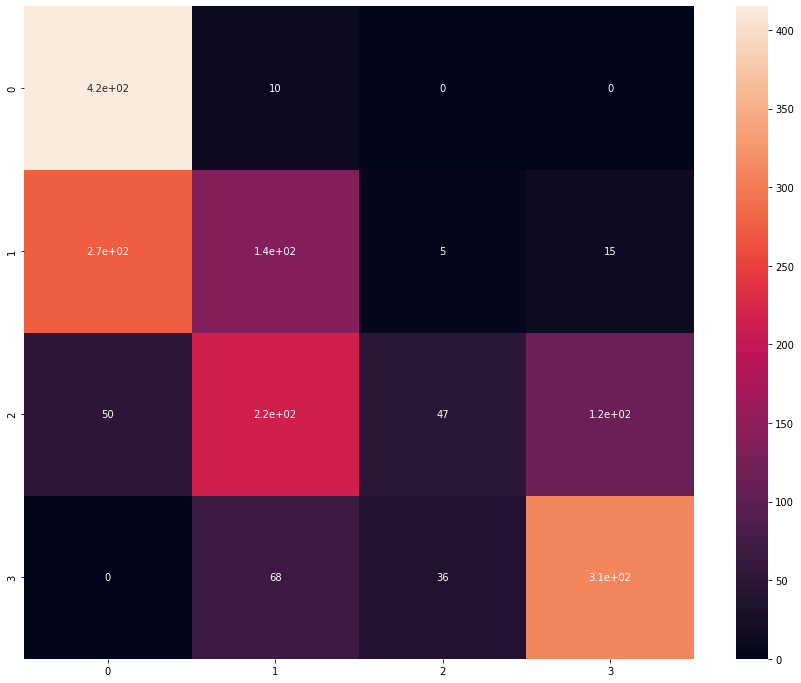

In [46]:
training_predicted_values=bagging_classifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

Training accuracy is 89%

# ________________________________________

# Now Testing the model 👇

              precision    recall  f1-score   support

           0       0.61      0.97      0.75        75
           1       0.31      0.39      0.35        67
           2       0.50      0.11      0.18        73
           3       0.72      0.68      0.70        85

    accuracy                           0.55       300
   macro avg       0.53      0.54      0.49       300
weighted avg       0.55      0.55      0.51       300



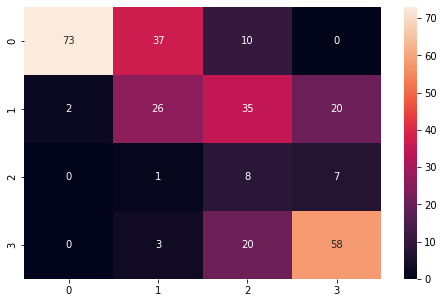

In [80]:
predicted_values=bagging_classifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

### Following will show that what is actual value and what is predicted by model 👇

In [48]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("     ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
      2  -->  1
      0  -->  0
      0  -->  0
      2  -->  1
      3  -->  3
      2  -->  0
      3  -->  3
      0  -->  0
      0  -->  0
      1  -->  1
      0  -->  0
      0  -->  0
      2  -->  1
      3  -->  3
      2  -->  2
      1  -->  3
      3  -->  1
      3  -->  3
      2  -->  3
      1  -->  0
      3  -->  3
      3  -->  2
      0  -->  0
      2  -->  1
      3  -->  2
      1  -->  0
      1  -->  0
      2  -->  1
      1  -->  3
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  1
      3  -->  3
      1  -->  1
      2  -->  3
      0  -->  0
      3  -->  1
      1  -->  1
      0  -->  0
      1  -->  0
      3  -->  3
      1  -->  1
      0  -->  0
      3  -->  2
      0  -->  0
      1  -->  0
      0  -->  0
      1  -->  0
      1  -->  1
      3  -->  3
      3  -->  3
      1  -->  1
      1  -->  0
      3  -->  1
      0  -->  0
      1  -->  0
      0  -->  0
      1  -->  0
     

# Boosting

In [49]:
XGBoost_classifier = xgboost.XGBClassifier()

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_Labels = le.fit_transform(training_Labels)
testing_Labels=le.transform(testing_Labels)

In [51]:
XGBoost_classifier.fit(training_Features,training_Labels)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00       427
           3       1.00      1.00      1.00       415

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



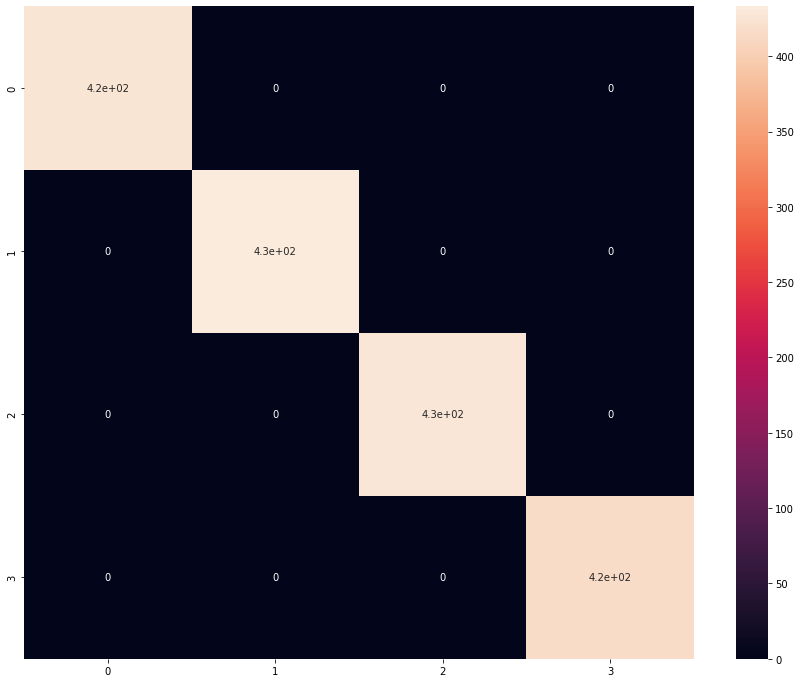

In [52]:
training_predicted_values=XGBoost_classifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.85      0.87      0.86        67
           2       0.83      0.86      0.85        73
           3       0.96      0.92      0.94        85

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



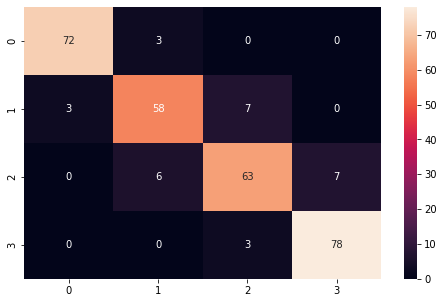

In [81]:
predicted_values=XGBoost_classifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

# RandomForestRegressor (Bagging)

In [54]:
randomForestClassifier=RandomForestClassifier()

In [55]:
randomForestClassifier.fit(training_Features,training_Labels)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00       427
           3       1.00      1.00      1.00       415

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



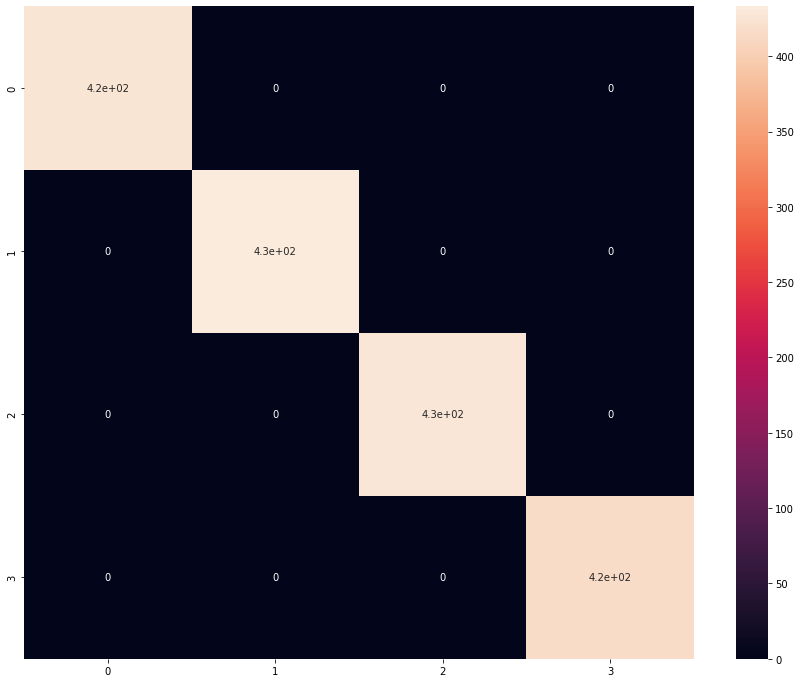

In [56]:
training_predicted_values=randomForestClassifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.84      0.85      0.84        67
           2       0.82      0.86      0.84        73
           3       0.98      0.93      0.95        85

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



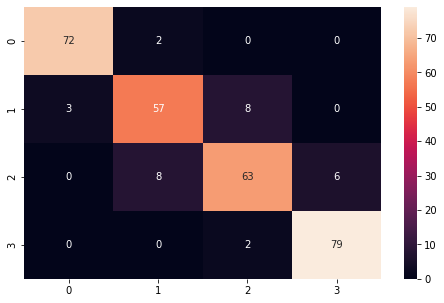

In [82]:
predicted_values=randomForestClassifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

# GradientBoostingClassifier

In [58]:
gradientBoostingClassifier=GradientBoostingClassifier()

In [59]:
gradientBoostingClassifier.fit(training_Features,training_Labels)

GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       433
           2       1.00      1.00      1.00       427
           3       1.00      1.00      1.00       415

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



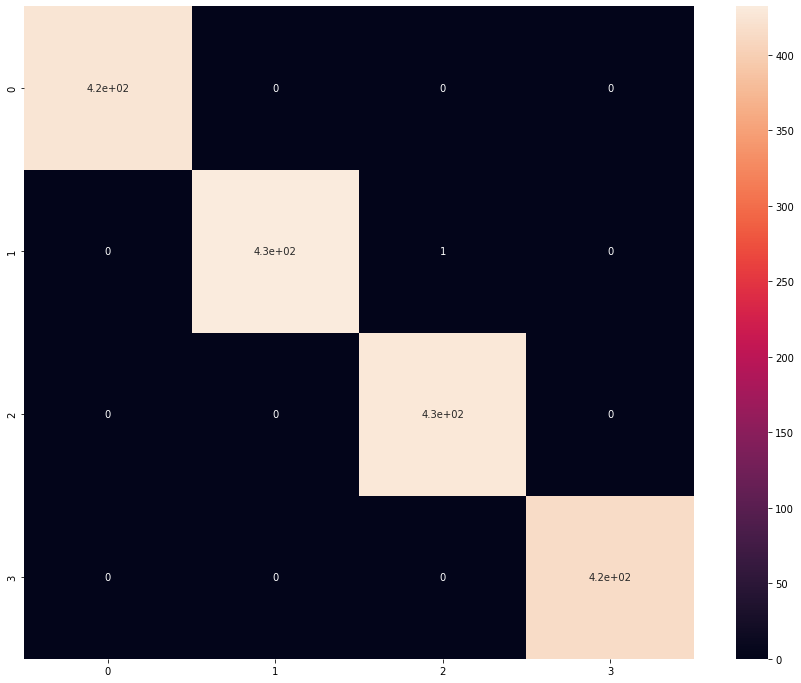

In [60]:
training_predicted_values=gradientBoostingClassifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        75
           1       0.81      0.90      0.85        67
           2       0.81      0.84      0.82        73
           3       0.96      0.88      0.92        85

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



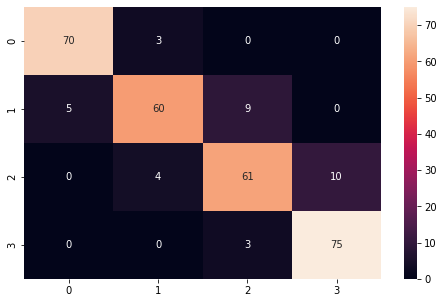

In [83]:
predicted_values=gradientBoostingClassifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

In [70]:
new_data=[842, 0, 0, 1, 0, 7, 188, 2, 20, 756, 2549, 9, 7, 19, 0, 0, 1]

In [76]:
print(classes_list[bagging_classifier.predict([new_data])[0]])

medium cost


In [77]:
print(classes_list[randomForestClassifier.predict([new_data])[0]])

medium cost


In [78]:
print(classes_list[gradientBoostingClassifier.predict([new_data])[0]])

medium cost
